In [5]:

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
#colors = cycle(‘bgrcmykbgrcmykbgrcmykbgrcmyk’)
import networkx as nx
import numpy as np


'''
Let us consider random walk on a random network
'''
walkLength = 20


# let's generate a graph G
G = nx.gnp_random_graph(5, 0.5)


# let networkx return the adjacency matrix A
A = nx.adj_matrix(G)
A = A.todense()
A = np.array(A, dtype = np.float64)
# let's evaluate the degree matrix D
D = np.diag(np.sum(A, axis=0))
# ...and the transition matrix T
T = np.dot(np.linalg.inv(D),A)



# define the starting node, say the 0-th
p = np.array([1, 0, 0, 0, 0]).reshape(-1,1)
visited = list()
for k in range(walkLength):
    # evaluate the next state vector
    p = np.dot(T,p)
    # choose the node with higher probability as the visited node
    visited.append(np.argmax(p))
    
    
print('number of visited nodes') 
print(visited)   
    


number of visited nodes
[3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0]


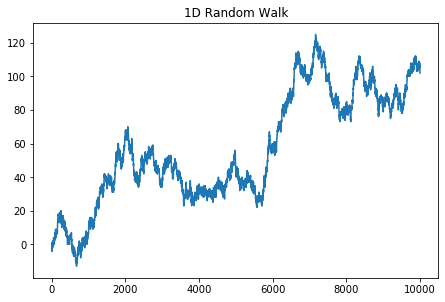

In [6]:
'''
Now let us visualise random walk on a network
'''
# Define parameters for the walk
dims = 1
step_n = 10000
step_set = [-1, 0, 1]
size = 10 
sizefig = 10

origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path

#fig =  plt.figure(figsize = (8, 8))#plt.figure(figsize=(sizefig,sizefig))
#fig = plt.figure(figsize=(8,4),dpi=200)
#ax = plt.subplot(332)#fig.add_subplot(111)

#ax.scatter(np.arange(step_n+1), path, c=’blue’,alpha=0.25,s=0.05);
plt.plot(path)#,c=’blue’,alpha=0.5,lw=0.5,ls=’ — ‘,);
plt.plot(0, start)#,c=’red’, marker=’+’)
plt.plot(step_n, stop)#, c=’black’, marker=’o’)
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig('plots/random_walk_1d.png',dpi=250);


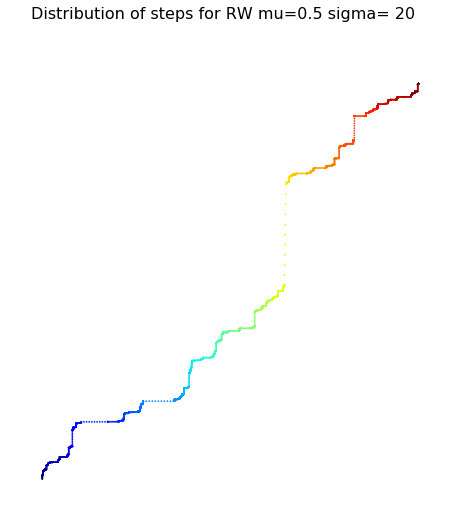

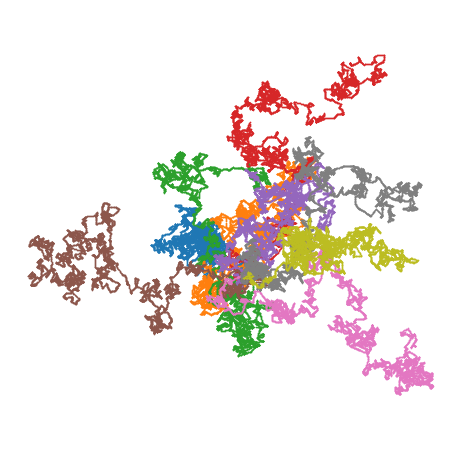

In [9]:
'''
Now let us visualize continuous time random walk 
'''


import matplotlib.image as mpimg


'''
Parameters setting

'''
n= 1000 #length of random walk
mu = 0.5 #normal distribution
sigma =20
beta = 5 #exponential parameters
a = 1 # pareto distribution
weib = 1 #weibul parameter



'''
Simple RW motion with random steps
'''

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) 

'''
Now we introduce some CTRW motion in between the steps
'''

x =  np.cumsum(np.random.exponential(1./beta, n))
y =  np.cumsum(np.random.exponential(1./beta, n))

x_w = np.cumsum(np.random.weibull(weib, n))
y_w = np.cumsum(np.random.weibull(weib, n))


x =  np.cumsum(np.random.pareto(a, n))
y =  np.cumsum(np.random.pareto(a, n))


x_n =  np.cumsum(np.random.normal(mu, sigma, n))
y_n =  np.cumsum(np.random.normal(mu, sigma, n))



# We add 10 intermediary points between two
# successive points. We interpolate x and y.


'''
plotting one RW
'''
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)

fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')



'''
plotting several RWs
'''


k = 10 #parameter of plotting
mu_i = 0.1 
sigma_i = 0.1
n_rw=9 #number of RWs to plot

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for i_rw in range(0,n_rw):    
    x_n =  np.cumsum(np.random.normal(mu_i, sigma, n))
    y_n =  np.cumsum(np.random.normal(mu_i, sigma, n))
    mu_i = mu_i +0.1
    sigma_i = sigma_i + 0.1


    x2 = np.interp(np.arange(n * k), np.arange(n) * k, x_n)
    y2 = np.interp(np.arange(n * k), np.arange(n) * k, y_n)

#    color =  ['tab:blue', 'tab:orange', 'tab:green']:
        
    # Now, we draw our points with a gradient of colors.
    ax.scatter(x2, y2, linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)

# Now, we draw our points with a gradient of colors.
#ax.scatter(x3, y3, c=range(n * k), linewidths=0,           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

plt.show()
